<a href="https://colab.research.google.com/github/AmirGhnbr/Bit_pred/blob/dev_branch/bit_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
TICKER = 'BTC-USD'

In [10]:
import yfinance as yf
import datetime
import pandas as pd

today = datetime.datetime.now()
start_year_ago = today-datetime.timedelta(days = 720)
btc_data = yf.download(tickers=TICKER, interval="1h",start= start_year_ago, end=today)
btc_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-29 07:00:00+00:00,28049.027344,28153.572266,27986.345703,28082.791016,28082.791016,302686208
2023-03-29 08:00:00+00:00,28085.640625,28619.542969,28051.339844,28517.246094,28517.246094,1484341248
2023-03-29 09:00:00+00:00,28504.824219,28558.160156,28330.734375,28335.826172,28335.826172,495386624
2023-03-29 10:00:00+00:00,28330.246094,28427.460938,28278.398438,28379.767578,28379.767578,188768256
2023-03-29 11:00:00+00:00,28380.179688,28380.375000,28278.326172,28341.636719,28341.636719,25208832


In [12]:
btc_data["OHLC4"] = (btc_data["Open"] + btc_data["High"] + btc_data["Low"] + btc_data["Close"]) / 4 
btc_data.tail()

,Open,High,Low,Close,Adj Close,Volume,OHLC4
Datetime,,,,,,,
2023-03-29 07:00:00+00:00,28049.027344,28153.572266,27986.345703,28082.791016,28082.791016,302686208,28067.934082
2023-03-29 08:00:00+00:00,28085.640625,28619.542969,28051.339844,28517.246094,28517.246094,1484341248,28318.442383
2023-03-29 09:00:00+00:00,28504.824219,28558.160156,28330.734375,28335.826172,28335.826172,495386624,28432.386230
2023-03-29 10:00:00+00:00,28330.246094,28427.460938,28278.398438,28379.767578,28379.767578,188768256,28353.968262
2023-03-29 11:00:00+00:00,28380.179688,28380.375000,28278.326172,28341.636719,28341.636719,25208832,28345.129395


In [13]:
bitcoin_prices_ohlc4_df = pd.DataFrame(btc_data["OHLC4"]).rename(columns={"OHLC4": "Price"})
bitcoin_prices_ohlc4_df.tail()

,Price
Datetime,
2023-03-29 07:00:00+00:00,28067.934082
2023-03-29 08:00:00+00:00,28318.442383
2023-03-29 09:00:00+00:00,28432.386230
2023-03-29 10:00:00+00:00,28353.968262
2023-03-29 11:00:00+00:00,28345.129395


In [14]:
def timesteps_and_prices(df):
  '''
  Parameters:
      df: dataframe that contains two columns (Date column, price column)
  output:
      timesteps : in pandas datetime format
      prices: in numpy format
  '''
  timesteps = pd.to_datetime(df.index.to_numpy())
  prices = df["Price"].to_numpy()

  return timesteps, prices


In [17]:
timesteps, prices = timesteps_and_prices(bitcoin_prices_ohlc4_df)
timesteps[:10], prices[:10]

(DatetimeIndex(['2021-04-08 11:00:00+00:00', '2021-04-08 12:00:00+00:00',
                '2021-04-08 13:00:00+00:00', '2021-04-08 14:00:00+00:00',
                '2021-04-08 15:00:00+00:00', '2021-04-08 16:00:00+00:00',
                '2021-04-08 17:00:00+00:00', '2021-04-08 18:00:00+00:00',
                '2021-04-08 19:00:00+00:00', '2021-04-08 20:00:00+00:00'],
               dtype='datetime64[ns, UTC]', freq=None),
 array([56679.22460938, 57039.88964844, 57491.19433594, 57658.19824219,
        57813.51367188, 57856.62695312, 57812.85546875, 57955.01757812,
        58043.94042969, 57863.69140625]))

In [18]:
def get_train_test_split(timesteps,prices, train_test_ratio=0.8):
  '''
  Parameters: 
      timesteps
      prices
  output:
      X_train, y_train, X_test, y_test
  '''
  split_size = int(0.8 * len(prices))
  X_train, y_train = timesteps[:split_size], prices[:split_size]

  X_test, y_test = timesteps[split_size:], prices[split_size:]
  return X_train, y_train, X_test, y_test


In [21]:
X_train, y_train, X_test, y_test = get_train_test_split(*timesteps_and_prices(bitcoin_prices_ohlc4_df))
X_train[:10]

DatetimeIndex(['2021-04-08 11:00:00+00:00', '2021-04-08 12:00:00+00:00',
               '2021-04-08 13:00:00+00:00', '2021-04-08 14:00:00+00:00',
               '2021-04-08 15:00:00+00:00', '2021-04-08 16:00:00+00:00',
               '2021-04-08 17:00:00+00:00', '2021-04-08 18:00:00+00:00',
               '2021-04-08 19:00:00+00:00', '2021-04-08 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [23]:
import matplotlib.pyplot as plt 

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters:
      timesteps : array of timesteps
      values : array of values across time
      format : style of plot, default "."
      start : where to start the plot (setting a value will index from start of timesteps & values)
      end : where to end the plot (setting a value will index from end of timesteps & values)
      label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

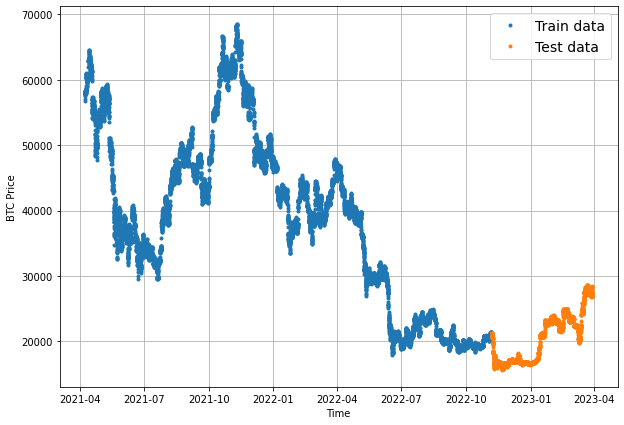

In [24]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [26]:
import numpy as np

def smape(actual, forecast):
    """
    Calculates Symmetric Mean Absolute Percentage Error (SMAPE) for time series evaluation
    Parameters:
        targets: a numpy array of actual values
        predictions: a numpy array of predicted values
    Returns:
        smape: the SMAPE value
    """
    epsilon = 1e-8
    dividend = np.abs(actual - forecast)
    denominator = np.abs(actual) + np.abs(forecast)
    smape = 200 * np.sum(np.divide(dividend, denominator + epsilon))/len(actual)
    return smape

In [27]:
def mape(actual, forecast):
    """
    Calculates Symmetric Mean Absolute Percentage Error (SMAPE) for time series evaluation
    Parameters:
        targets: a numpy array of actual values
        predictions: a numpy array of predicted values
    Returns:
        mape: the SMAPE value
    """
    epsilon = 1e-8
    dividend = np.abs(actual-forecast)
    denomenator = np.abs(actual)
    mape = 100*np.sum(np.divide(dividend,denomenator + epsilon))/len(actual)
    return mape

In [28]:
def mean_absolute_scaled_error(actual, forecast, horizon=1):
    """
    Parameters:
        actual: numpy array-like with actual values
        forecast: numpy array-like with forecasted values
        horizon: int for the difference between naive forecast and actual value
    Outputs:
        mase: float, mean absolute scaled error
    """
    actual = np.array(actual)
    forecast = np.array(forecast)

    # Calculate the absolute errors
    abs_errors = np.abs(actual - forecast)

    # Calculate the mean absolute error
    mean_absolute_error = np.mean(abs_errors)

    # Calculate the mean absolute error for the naive forecast
    naive_forecast_errors = np.abs(actual[horizon:] - actual[:-horizon])
    mean_absolute_naive_error = np.mean(naive_forecast_errors)

    # Calculate the mean absolute scaled error
    mase = mean_absolute_error / mean_absolute_naive_error

    return mase

## Define custom metricses 

In [ ]:
import tensorflow as tf 
class SMAPE(tf.keras.metrics.Metric): 
  def __init__(self, name='smape', **kwargs):
     super(SMAPE, self).__init__(name=name, **kwargs) 
     self.epsilon = 1e-8 
     self.total_smape = self.add_weight(name='total', initializer='zeros') 
     self.counter = self.add_weight(name='counter', initializer='zeros') 
  def update_state(self, y_true, y_pred, sample_weight=None): 
    dividend = tf.abs(y_true - y_pred) 
    denominator = tf.abs(y_true) + tf.abs(y_pred) 
    smape = 200 * tf.divide(dividend, denominator + self.epsilon) 
    self.total_smape.assign_add(tf.reduce_sum(smape)) 
    self.counter.assign_add(tf.cast(tf.size(y_true), dtype=tf.float32)) 
  def result(self): 
    return tf.math.divide_no_nan(self.total_smape, self.counter) 
  def reset_states(self): 
    self.total_smape.assign(0.) 
    self.counter.assign(0.) 